In [2]:
%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

pd.options.display.max_colwidth = 100

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot, offline
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import requests

from os import listdir
import unicodedata

from paths import *
from tools.vizu import remove_acentos
from tools.vizu import normalize_cols
from tools.io import read_sheets


from datetime import datetime
today = datetime.today().strftime('%Y-%m-%d')


# Import Data

# Brasil.IO

In [3]:
import json

url = "https://brasil.io/api/dataset/covid19/caso/data?format=json"
response = requests.get(url)
data = response.text
parsed = json.loads(data)

In [4]:
df = pd.DataFrame(parsed['results']).sort_values(by='confirmed',ascending=False)

### GET ONLY DA STATES TO MAKE THE BRASIL DATA
mask = df['place_type'] == 'state'
df['city'] = np.where(mask,df['state'],df['city'] )

### SUM STATES DATA
mask = (df['place_type']=='state')
df_brasil = df[mask].groupby(by=['date'], as_index=False).sum()

### FILL DATA FOR BRASIL
df_brasil['city']='Brasil'
df_brasil['city_ibge_code']=0
df_brasil['estimated_population_2019'] = 209*10**6
df_brasil['is_last'] = [False for i in range(len(df_brasil)-1)] + [True]
df_brasil['place_type'] = 'country'
df_brasil['state'] = 'BR'



In [5]:
### SUM STATES DATA
mask = (df['place_type']=='state') & (df['state']!='SP')
not_sp = df[mask].groupby(by=['date'], as_index=False).sum()

### FILL DATA FOR BRASIL
not_sp['city']='Exceto SP'
not_sp['city_ibge_code']=1
not_sp['estimated_population_2019'] = 209*10**6 - 45919049
not_sp['is_last'] = [False for i in range(len(not_sp)-1)] + [True]
not_sp['place_type'] = 'state'
not_sp['state'] = 'not_sp'

In [6]:
### PUT BRASIL DATA IN DF
df = pd.concat([df_brasil[df.columns],not_sp[df.columns],df],axis=0)


### GET ONLY LAST DAY
mask = df['date'] < today
df = df[mask]

df = df.sort_values(by=['date'],ascending=False)
df = df.sort_values(by=['confirmed'],ascending=False)

In [7]:
# mask = df['city'].isin(['Brasil','Exceto SP','SP','RJ'])
mask = ((df['place_type']!='city'))
dd = df[mask]

dd = dd.sort_values(by=['date'],ascending=False)


In [9]:
# in_cities = ['Brasil','Exceto SP' ,'SP', 'RJ']
in_cities = ['Brasil','SP', 'RJ']

cities = dd['city'].unique()
drop_cities = [city for city in cities if city not in in_cities]
drop_cities.sort()

cities = in_cities + drop_cities

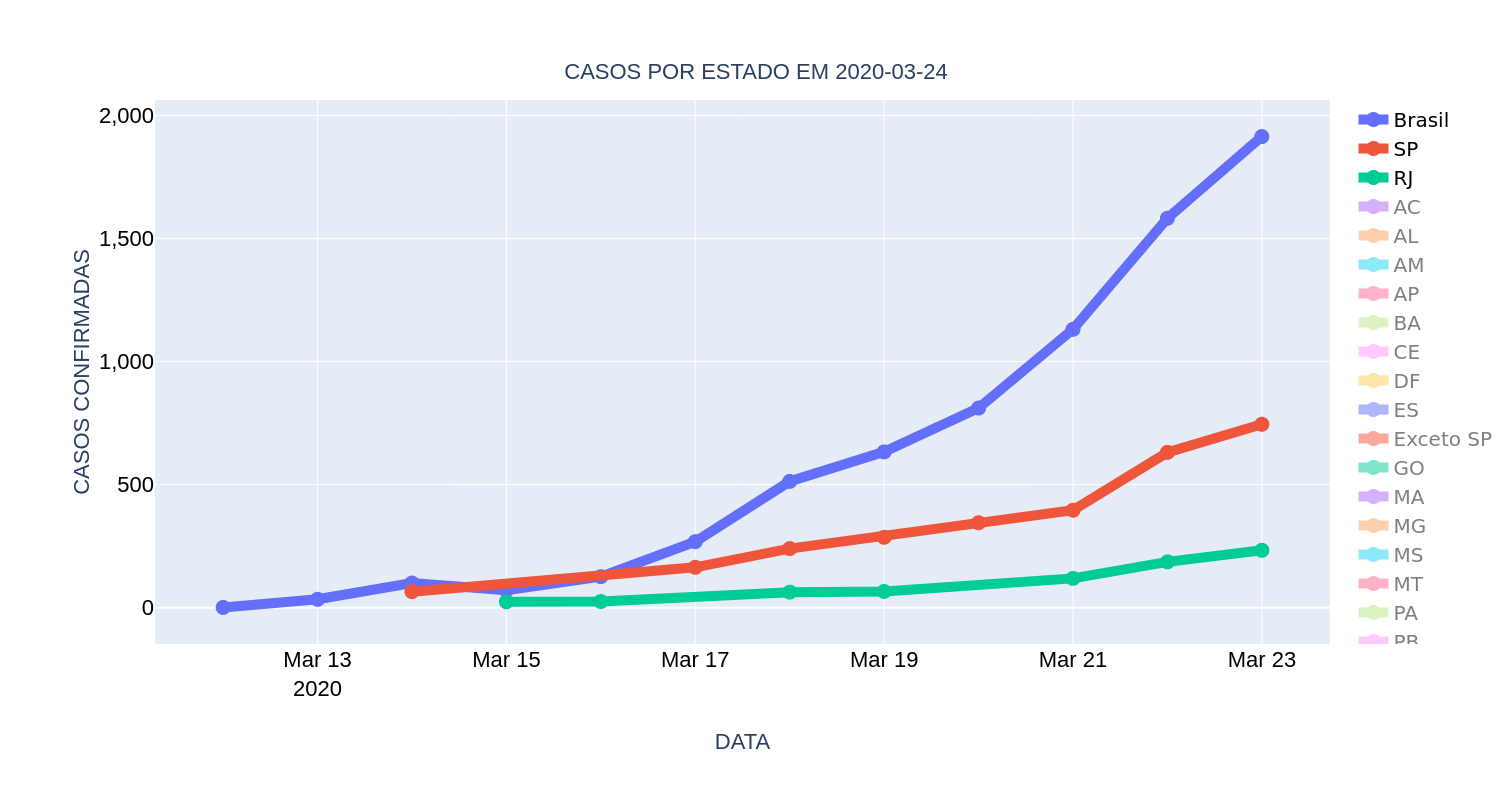

In [19]:
from tools.vizu import brasil_vis

var_col = 'confirmed'
escala  = 'lin'
cities  = cities
largura = None
save    = True

# mask = ((dd[var_col]>0))
# dd = dd[mask]


brasil_vis(dd, var_col,cities, drop_cities, escala, today=today, save=True)